In [3]:
#   Preparing the Data 
## Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [4]:
## Read in the dataset
path = '/Users/namhuynh/Documents/NHAT_NAM/PROJECTS/3rd_PROJECT/movies.csv'
df = pd.read_csv(path)

In [5]:
## Look at information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


The budget seems to have a lot of missing value, which needs further investigation in the Data Cleaning Process.

In [6]:
## Look at first 5 rows
df.head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


Budget and Gross columns have a very large number, which is not readable. I will transform them in the later process.

In [7]:
## Let's see if there is any missing data
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [8]:
## Find how many missing data we have in percentage
for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, percent_missing*100))

name - 0.0%
rating - 1.004173187271779%
genre - 0.0%
year - 0.0%
released - 0.02608242044861763%
score - 0.03912363067292645%
votes - 0.03912363067292645%
director - 0.0%
writer - 0.03912363067292645%
star - 0.013041210224308816%
country - 0.03912363067292645%
budget - 28.31246739697444%
gross - 2.464788732394366%
company - 0.2217005738132499%
runtime - 0.05216484089723526%


It appears that approximately 30% of the data is missing.

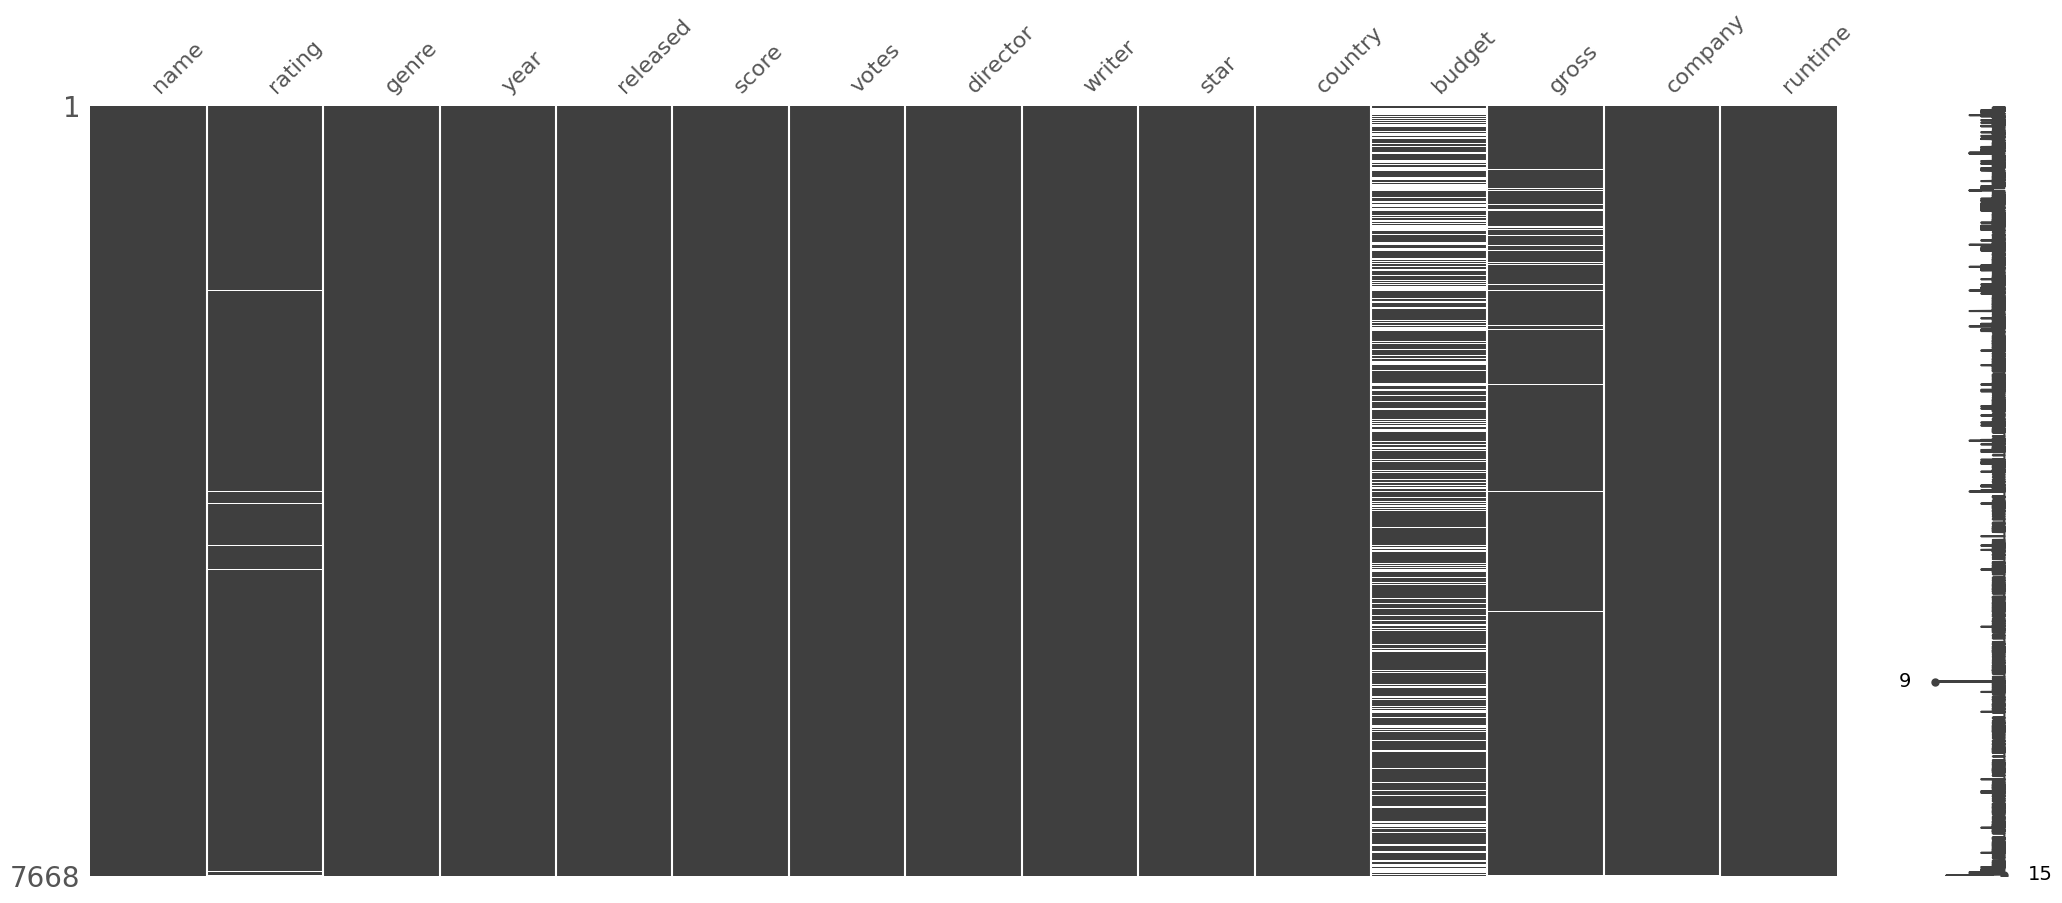

In [9]:
## Visualizing the missing data of every columns
msno.matrix(df)
plt.show()

Missing at Random or Missing not at Random ?
Upon observation, the missing Budget values seem to be randomly distributed across the column. Now, our next step is to investigate whether this missingness is characterized as Missing at Random (MAR) or Missing not at Random (MNAR).

In [10]:
## I will isolate the missing and the completed values aside.
missing  = df[df['budget'].isna()]
complete = df[~df['budget'].isna()]

In [11]:
complete.describe()

,year,score,votes,budget,gross,runtime
count,5497.00000,5494.000000,5.494000e+03,5.497000e+03,5.436000e+03,5495.000000
mean,2001.54648,6.385948,1.137758e+05,3.558988e+07,1.030045e+08,108.053685
std,10.62366,0.968827,1.835858e+05,4.145730e+07,1.871051e+08,18.168172
min,1980.00000,1.900000,1.800000e+01,3.000000e+03,3.090000e+02,55.000000
25%,1993.00000,5.800000,1.800000e+04,1.000000e+07,1.067412e+07,95.000000
50%,2002.00000,6.500000,5.200000e+04,2.050000e+07,3.671199e+07,105.000000
75%,2010.00000,7.000000,1.280000e+05,4.500000e+07,1.119478e+08,118.000000
max,2020.00000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,271.000000


In [12]:
missing.describe()

,year,score,votes,budget,gross,runtime
count,2171.000000,2171.000000,2.171000e+03,0.0,2.043000e+03,2169.000000
mean,1997.516352,6.401704,2.315393e+04,NaN,1.330069e+07,105.254956
std,11.917771,0.969009,5.481697e+04,NaN,3.935595e+07,19.449220
min,1980.000000,1.900000,7.000000e+00,NaN,6.820000e+02,71.000000
25%,1987.000000,5.800000,2.800000e+03,NaN,9.172055e+05,93.000000
50%,1995.000000,6.500000,8.500000e+03,NaN,3.984669e+06,102.000000
75%,2008.000000,7.100000,2.400000e+04,NaN,1.299659e+07,112.000000
max,2020.000000,8.600000,1.100000e+06,NaN,9.770435e+08,366.000000


Upon reviewing both DataFrames, a significant disparity in the average Gross values is apparent, with an an approximate 10 time difference between the two. Based on this observation, I hypothesize that there is a tendency for MORE MISSING BUDGET VALUES WHEN THE GROSS IS LOW.

Let’s sort our DataFrame by Gross and plot to see the distribution of missing value again.

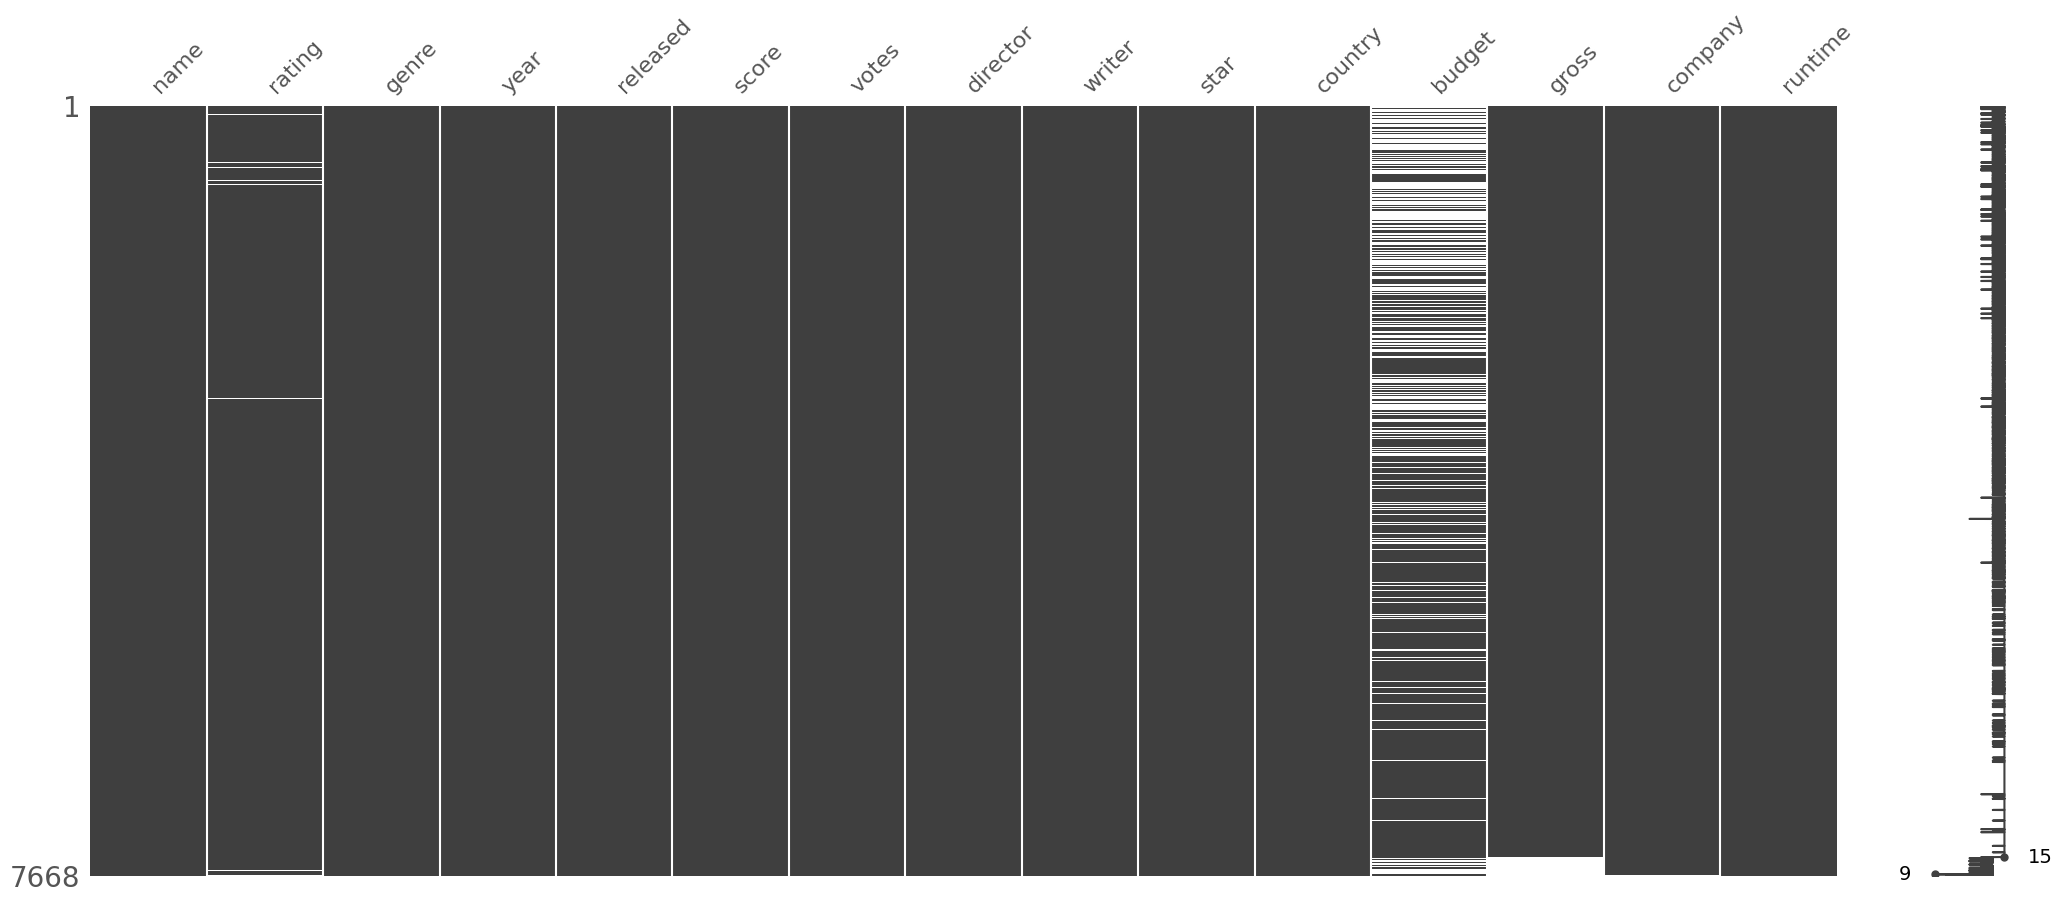

In [13]:
## Let's see if gross has anything to do with this
sorted_gross = df.sort_values(by = 'gross')
msno.matrix(sorted_gross)
plt.show()

In [14]:
##Impute the missing value with KNN
#Import library
from sklearn.impute import KNNImputer

#create df_imputed
df_imputed = df.copy()

#Using n_neighbors = 10
knn_imp = KNNImputer(n_neighbors = 10)

#Fit the KNNImputer to our dataset
df_imputed[['budget','gross']] = knn_imp.fit_transform(df[['budget','gross']])

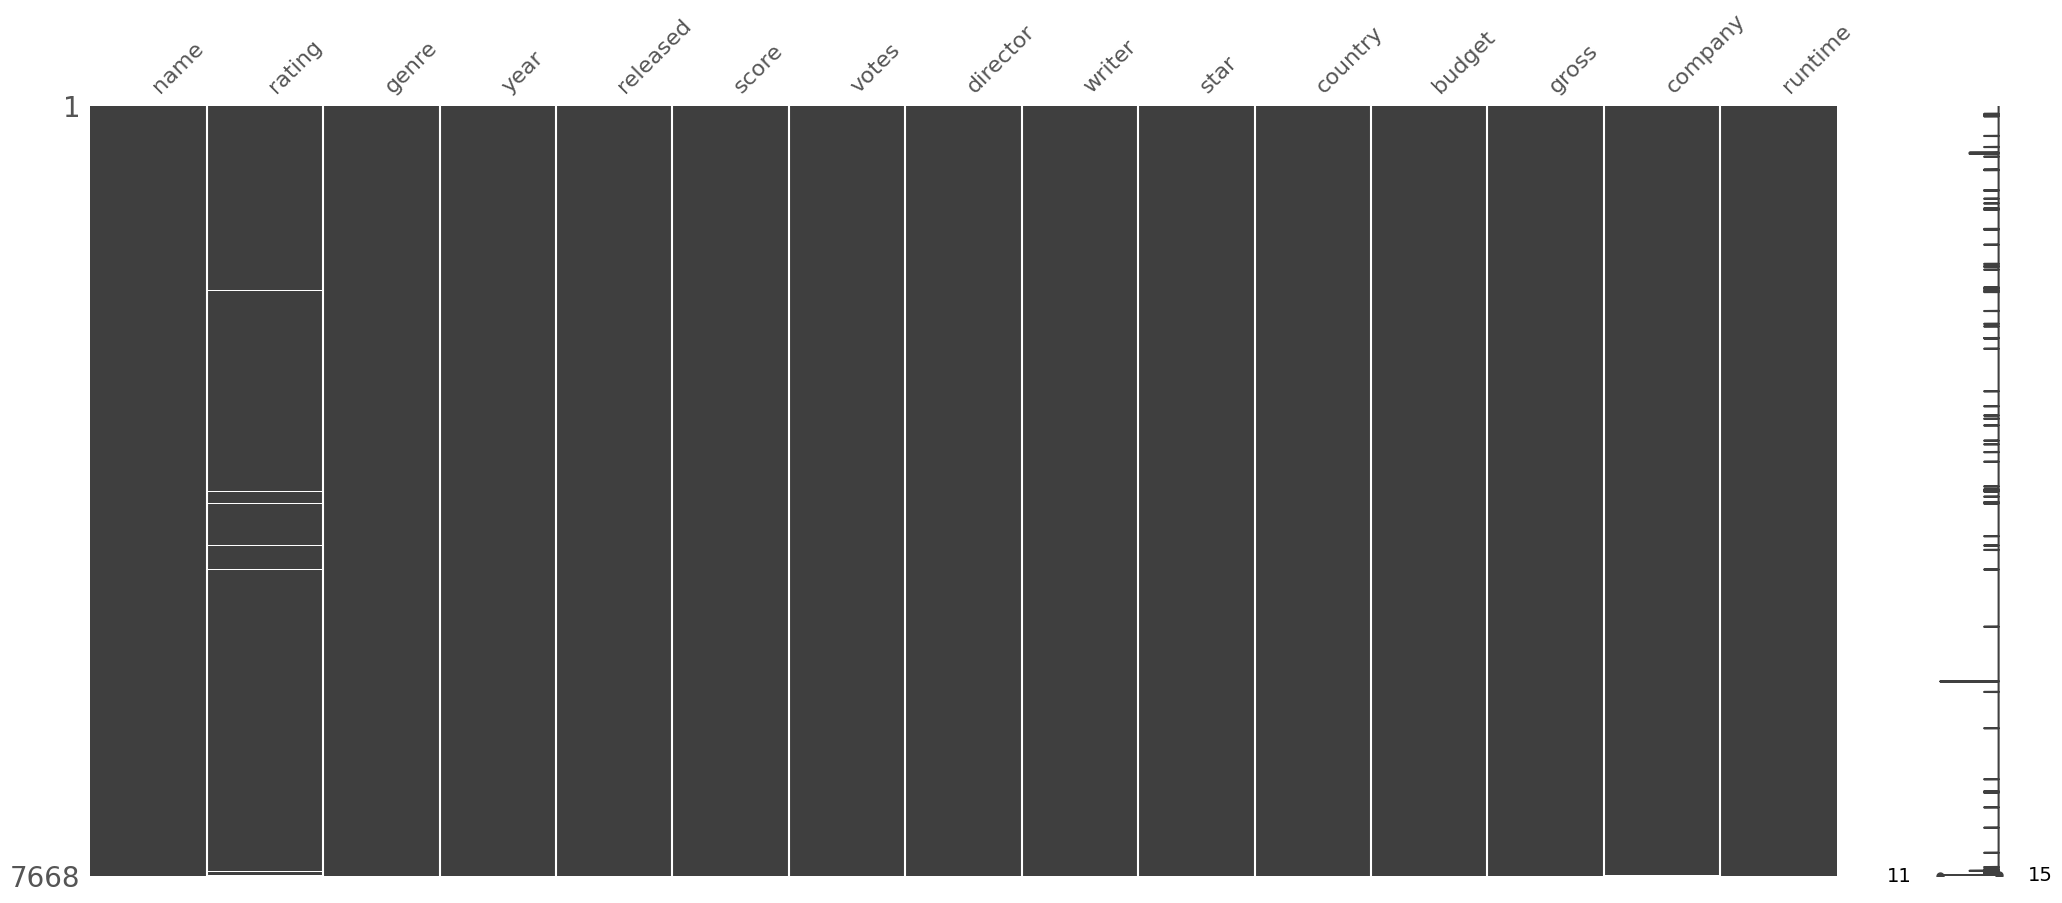

In [15]:
msno.matrix(df_imputed)
plt.show()

In [16]:
df_cleaned= df_imputed.dropna()

In [17]:
## Check if there are any impossible values (negative Budget and Gross)

df_cleaned[df_cleaned['gross'] < 0]
df_cleaned[df_cleaned['budget'] < 0]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime


In [18]:
#Convert Budget and Gross from float64 to int

df_cleaned['budget'] = df_cleaned['budget'].astype('int')
df_cleaned['gross'] = df_cleaned['gross'].astype ('int')

In [19]:
## Create the new columns

df_cleaned['gross_in_mill'] = df_cleaned['gross']/1000000
df_cleaned['budget_in_mill'] = df_cleaned['budget']/1000000

## Drop the old columns

df_cleaned = df_cleaned.drop(columns = 'budget')
df_cleaned = df_cleaned.drop(columns = 'gross')

In [20]:
df_country = df_cleaned.groupby(['country']).size().sort_values(ascending = False)

print(pd.DataFrame({'Percentage': df_country/len(df_cleaned)*100}))

                                Percentage
country                                   
United States                    71.903882
United Kingdom                   10.668075
France                            3.498812
Canada                            2.468973
Germany                           1.505149
Australia                         1.201479
Japan                             0.990230
India                             0.805387
Italy                             0.765778
Spain                             0.620544
Ireland                           0.567732
Hong Kong                         0.567732
China                             0.462107
Denmark                           0.409295
South Korea                       0.409295
New Zealand                       0.330077
Sweden                            0.316874
Mexico                            0.277264
Norway                            0.158437
Netherlands                       0.158437
Switzerland                       0.132031
Iran       

<Axes: xlabel='country', ylabel='count'>

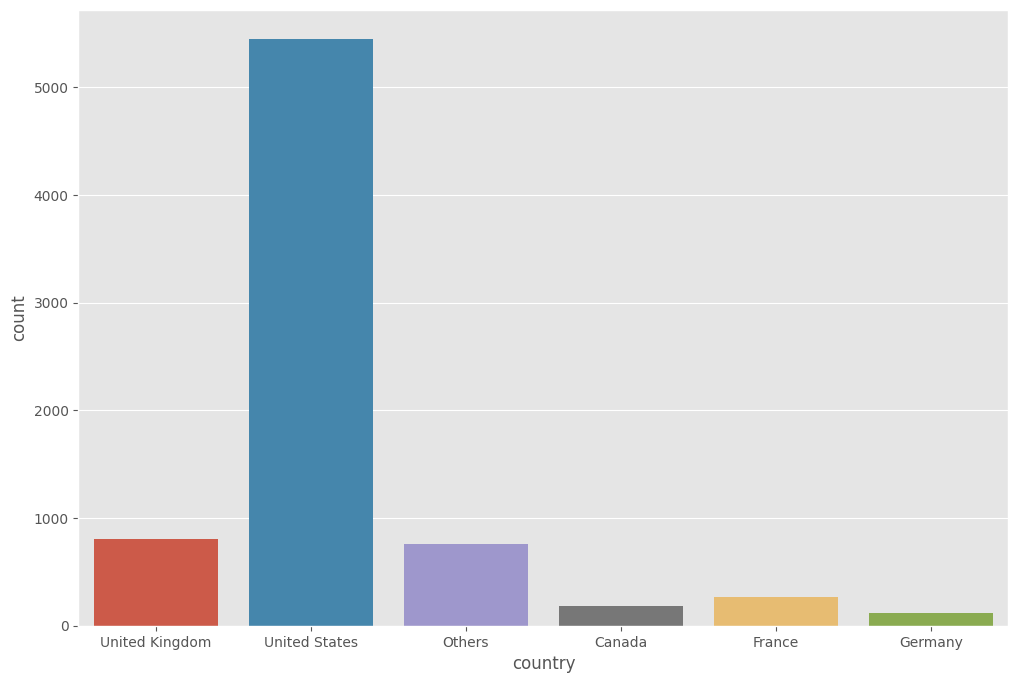

In [21]:
#Merge any country that have less that 100 movies into others

n = 100
counts = df_cleaned['country'].value_counts()
others = set(counts[counts < n ].index)
df_cleaned['country'] = df_cleaned['country'].replace(list(others),'Others')

#Visualize the transformed country columns
sns.countplot(data=df_cleaned, x = 'country')

<Axes: xlabel='genre', ylabel='count'>

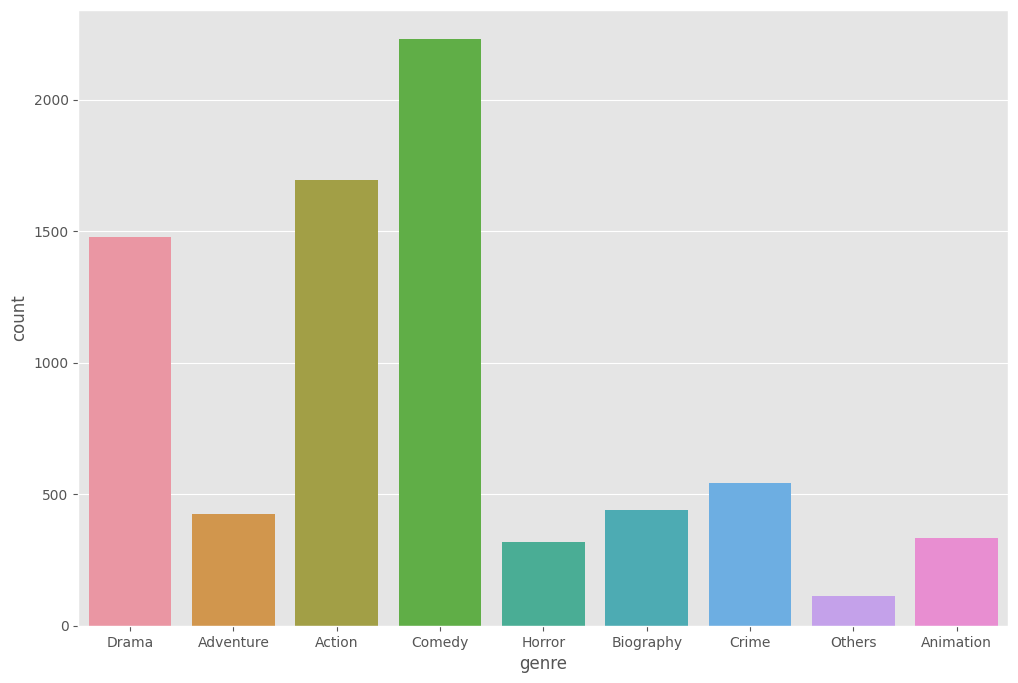

In [22]:
#Merge Genre that occur less than 100 times to 'Others'
n = 100
counts = df_cleaned['genre'].value_counts()
others = set(counts[counts < n].index)
df_cleaned['genre'] = df_cleaned['genre'].replace(list(others), 'Others')

#Visualize the transformed genre columns

sns.countplot(data=df_cleaned, x ='genre')

<Axes: title={'center': 'Average Budget of Genre in Millions'}, xlabel='Genre', ylabel='genre'>

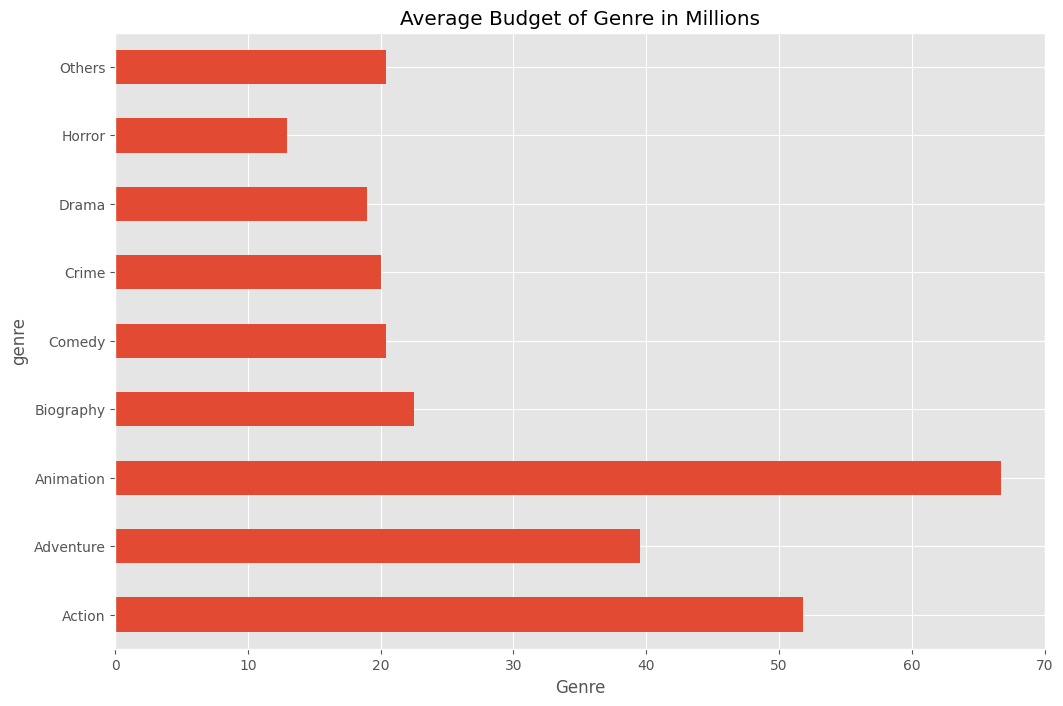

In [23]:
df_cleaned.groupby('genre')['budget_in_mill'].mean().plot(
  kind = 'barh', xlabel = 'Genre', title = 'Average Budget of Genre in Millions')

<Axes: title={'center': 'Average Gross of Genre in Millions'}, xlabel='Genre', ylabel='genre'>

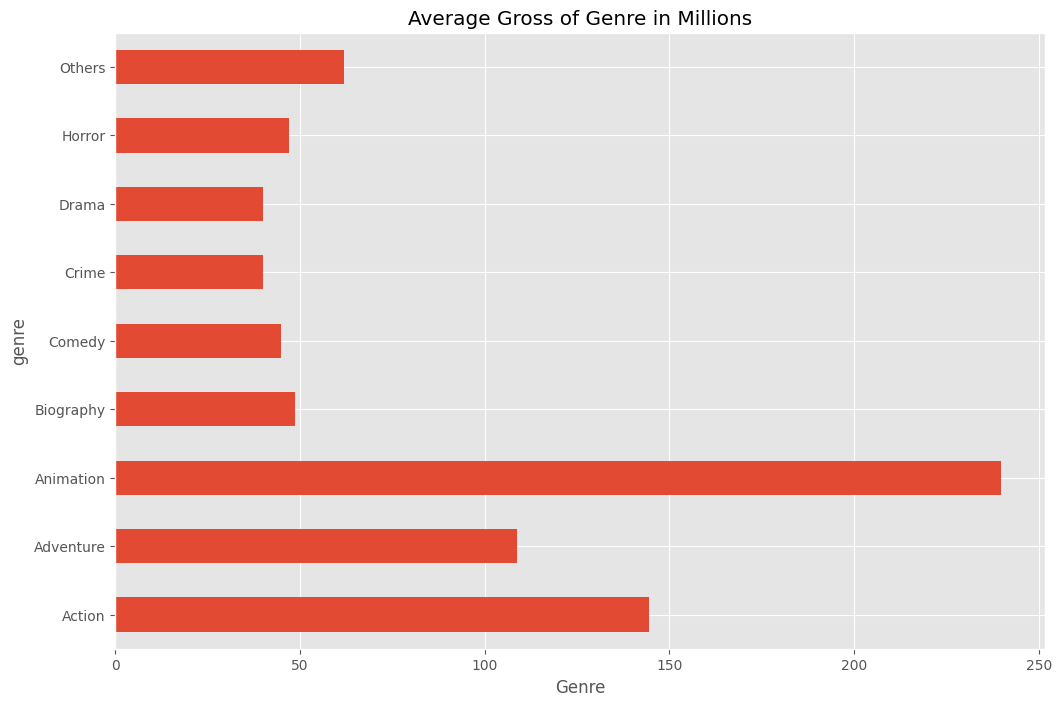

In [25]:
df_cleaned.groupby('genre')['gross_in_mill'].mean().plot(
kind = 'barh', xlabel = 'Genre', title = 'Average Gross of Genre in Millions')

<Axes: title={'center': 'ROI of each Genre (%)'}, xlabel='Genre', ylabel='genre'>

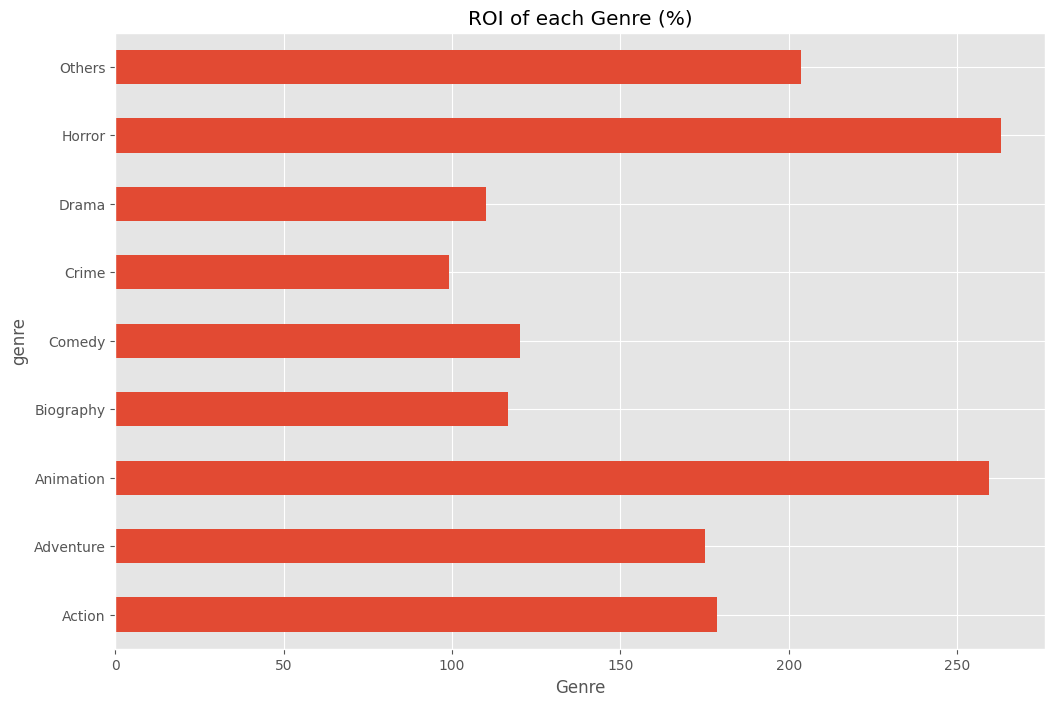

In [26]:
#Calculate the Net Profit of each genre (the outcome of Total Revenue - Total Cost)

net_profit = df_cleaned.groupby('genre')['gross_in_mill'].mean() - df_cleaned.groupby('genre')['budget_in_mill'].mean()

# Find the ROI by dividing Net Profit with the Total Cost, then mutiply by 100 to get the result in percentage
ROI = (net_profit / df_cleaned.groupby('genre')['budget_in_mill'].mean()) * 100

#Visualize the ROI by genre

ROI.plot(kind = 'barh', xlabel = 'Genre', title = 'ROI of each Genre (%)')

In [ ]:
# Correlation between each numeric features

Correlation refers to the statistical relationship between two variables. It indicates how strongly two variables linearly move in relation to one another.

Notably, there are several methods that can be used to find a correlation. For this project, I will use the Pearson Correlation method.

In [ ]:
## My hypothesis is that Budget and Gross are correlated. Let’s plot the graph to see the trend first.

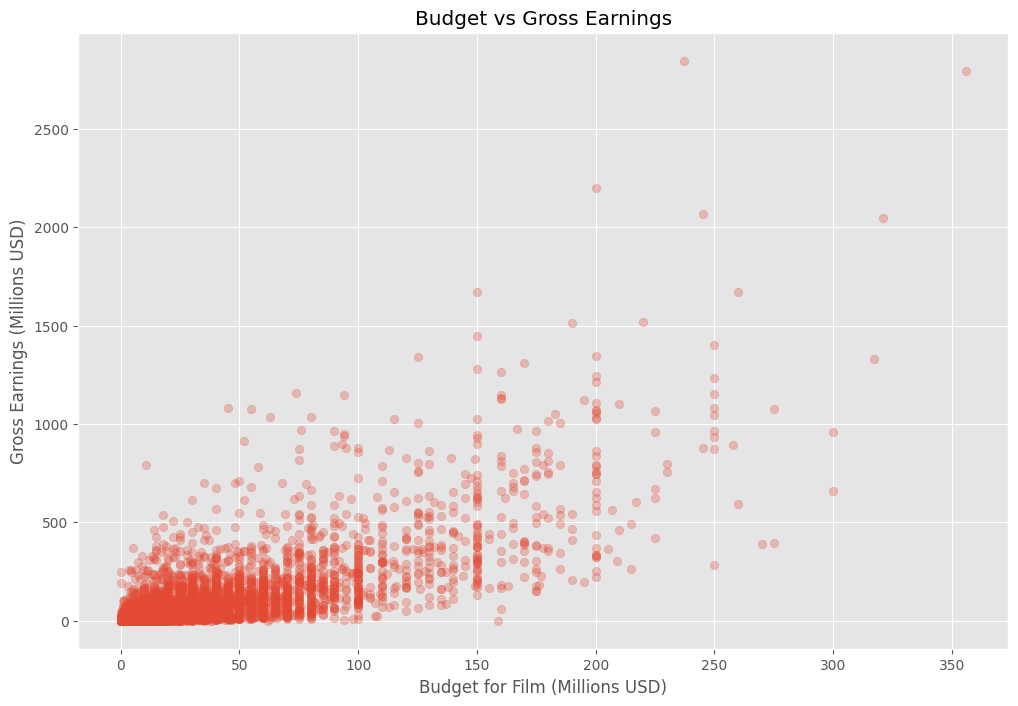

In [27]:
plt.scatter(x = df_cleaned['budget_in_mill'], y = df_cleaned['gross_in_mill'], alpha = 0.3)
plt.title('Budget vs Gross Earnings')

plt.xlabel('Budget for Film (Millions USD)')
plt.ylabel('Gross Earnings (Millions USD)')

plt.show()

In [ ]:
## They both seem to be correlated; let’s add the regression line to see the trend better.

Text(0.5, 0, 'Budget for Film (in Millions USD)')

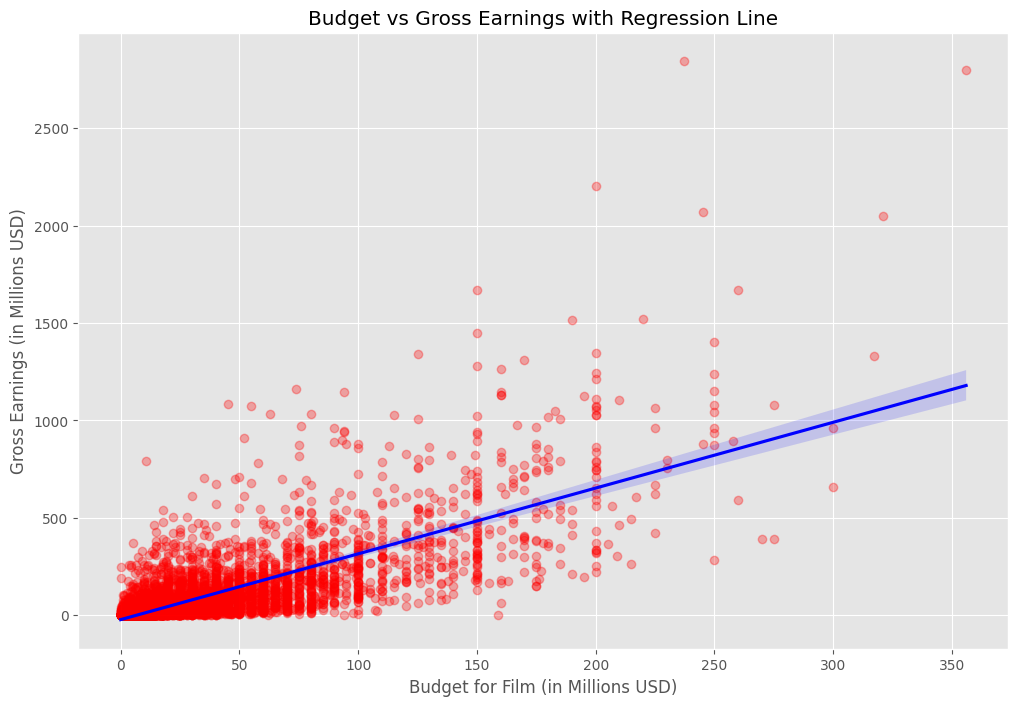

In [31]:
sns.regplot(x = 'budget_in_mill', y = 'gross_in_mill', data = df_cleaned, scatter_kws = {'color': 'red', 'alpha':0.3}, line_kws = {'color':'blue'})

plt.title('Budget vs Gross Earnings with Regression Line')
plt.ylabel('Gross Earnings (in Millions USD)')
plt.xlabel('Budget for Film (in Millions USD)')

In [ ]:
## To confirm my hypothesis, let’s use Corr() function to see how much there are correlated and visualize it in the heatmap.

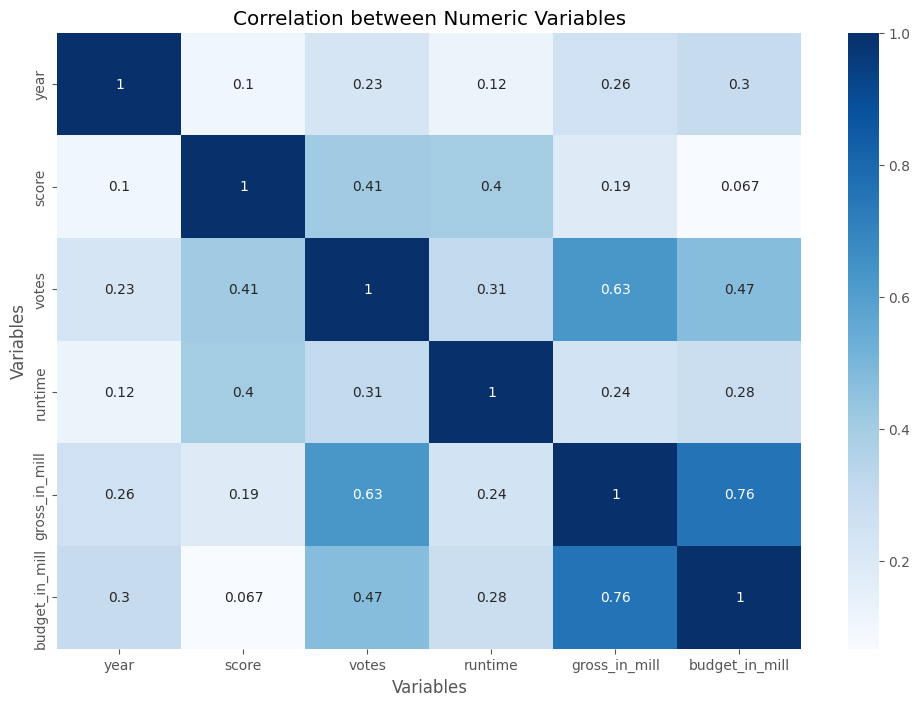

In [34]:
numeric_columns = df_cleaned.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()

sns.heatmap(correlation_matrix, annot= True, cmap = 'Blues')
plt.title('Correlation between Numeric Variables')
plt.xlabel('Variables')
plt.ylabel('Variables')

plt.show()


This heatmap has confirmed that my hypothesis about the correlation between Budget and Gross is correct. They both have an r-value of 0.76, which means they are strongly positively correlated.

Interestingly, Votes also have a high correlation with Gross. This is indeed a new insight that we should be aware of.

In [ ]:
# Let’s check whether the high positive correlation between Budget — Gross and Votes — Gross are statistically significant.

In [35]:
#Import Library
from scipy.stats import linregress

#Calculate P-Value of Budget vs Gross
slope, intercept, r_value, p_value, std_err = linregress(df_cleaned['budget_in_mill'], df_cleaned['gross_in_mill'])

#Print p_value
print('Slope: {}\nIntercept: {}\nr_value: {}\np_value: {}\nstd_err: {}\n'.format(slope,intercept,r_value,p_value,std_err))

Slope: 3.377361572460393
Intercept: -22.913025632974737
r_value: 0.7575829390460618
p_value: 0.0
std_err: 0.033441178518360336



The p_value is less than 0.05; this confirms that with the confidence interval of 95%, the correlation between Budget and Gross is statistically significant.

In [36]:
## Now let’s do the same with the correlation between Votes and Gross.
#Calculate p_value of Votes vs Gross
slope, intercept, r_value, p_value, std_err = linregress(df_cleaned['votes'], df_cleaned['gross_in_mill'])

#Print p_value
print('Slope: {}\nIntercept: {}\nr_value: {}\np_value: {}\nstd_err: {}\n'.format(slope,intercept,r_value,p_value,std_err))

Slope: 0.000632010992833582
Intercept: 22.372610771139115
r_value: 0.6302185958065888
p_value: 0.0
std_err: 8.947950458386382e-06



The p_value for Votes and Gross is also less than 0.05; they are statistically significant to each other.

In [ ]:
# Create Linear Regression Models

To begin with, I will build a simple linear regression model first. Simple linear regression is a linear regression model with a single explanatory variable. The point of this model is to find a linear function that predicts the dependent variable values as accurately as possible.

In [38]:
## First, let’s assign the value of each variables to x and y
x = df_cleaned[['budget_in_mill']].values
y = df_cleaned[['gross_in_mill']].values

In [39]:
## Then split the data into train and test dataset
#import the library
from sklearn.model_selection import train_test_split

# Split the data into train and test dataset with test size of 20%
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state= 42)

In [40]:
## Fit the train dataset to our model
#Import the library
from sklearn.linear_model import LinearRegression

#Fitting Simple Linear regression data model to train data set
mymodel = LinearRegression()
mymodel.fit(x_train,y_train)

LinearRegression()

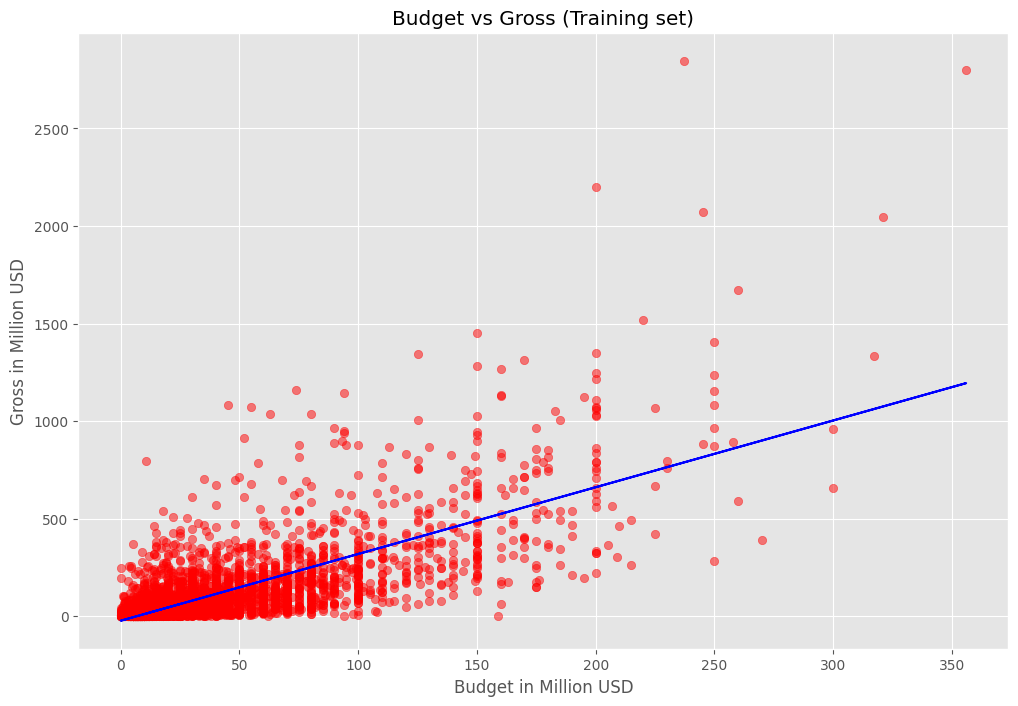

In [41]:
## Our model has been trained, now let’s use our trained model to predict the Gross
#Use trained model to predict the Gross in test dataset
y_pred_test_data = mymodel.predict(x_test)

#Visualising the Training set results in scatter plot

plt.scatter(x_train, y_train, color = 'red', alpha = 0.5)
plt.plot(x_train, mymodel.predict(x_train), color = 'blue')
plt.title('Budget vs Gross (Training set)')
plt.xlabel('Budget in Million USD')
plt.ylabel('Gross in Million USD')
plt.show()

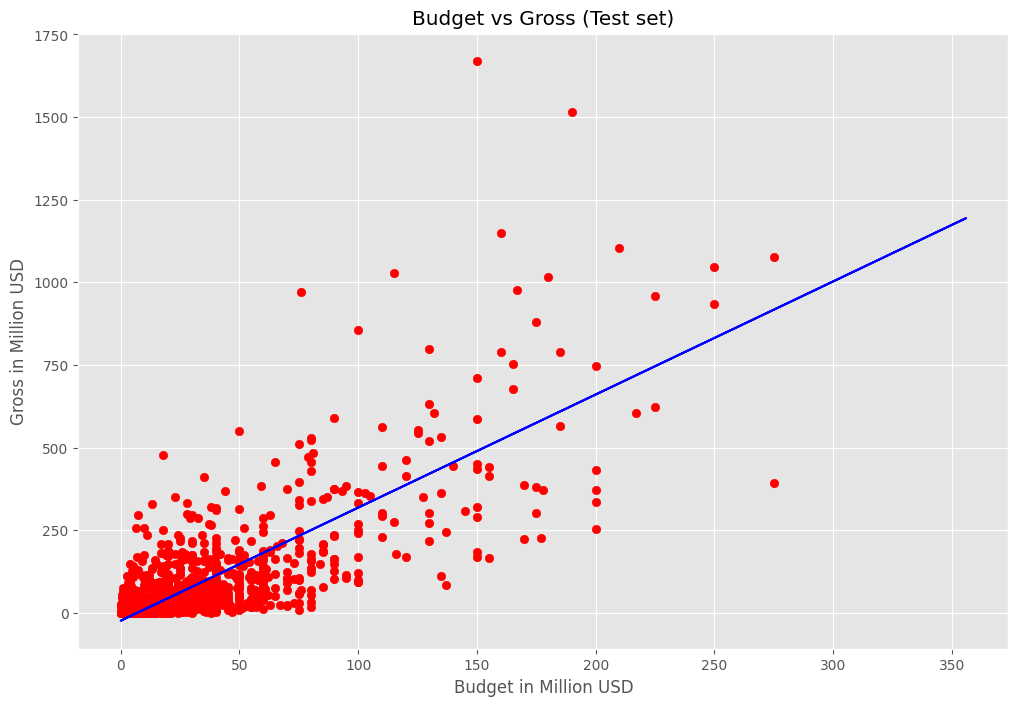

In [42]:
## Our trained model seem to do pretty well with the train dataset, now let’s visualize the the test dataset
# Visualizing the test set in a scatter plot

plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, mymodel.predict(x_train), color = 'blue')
plt.title('Budget vs Gross (Test set)')
plt.xlabel('Budget in Million USD')
plt.ylabel('Gross in Million USD')
plt.show()

The model also seems to work well with the test dataset.

Text(0.5, 1.0, 'Evaluation Budget vs Gross (Simple Linear Regression Model)')

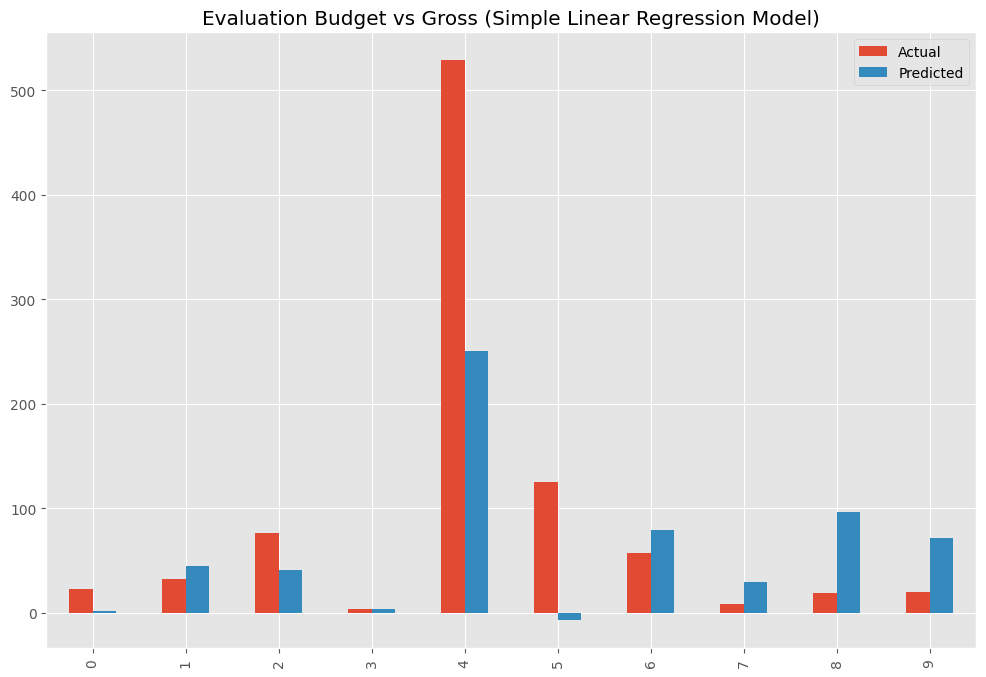

In [43]:
## Let’s evaluation our model
#Evaluate the model
evaluate = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_test_data.flatten()})

#Plot the evaluation
evaluate.head(10).plot(kind = 'bar')
plt.title('Evaluation Budget vs Gross (Simple Linear Regression Model)')

In [44]:
## What score our model got ?
# Find R-squared of the model

mymodel.score(x_test,y_test)

0.5928743591750141

Our initial model got 58.49% accuracy, which is fine, but we can do it better.

In [ ]:
## Multiple Regression Model

To improve our model, we need to add more independent variables to the model. Which now we have to change the model from Simple Linear Regression Model to Multiple Regression instead.

The multiple linear regression attempts to model the relationship between explanatory variables and a response variable (similar with Simple Linear Regression but with more explanatory variables).

In [46]:
## In this case, we will add Votes variable into our model
# Insert votes to increase the performance of the model
x = df_cleaned[['budget_in_mill', 'votes']]
y = df_cleaned[['gross_in_mill']]

In [47]:
## Then split the data into train and test dataset
# Splitting the dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [48]:
## Fit the train dataset to our model
mymodel.fit(x_train, y_train)

LinearRegression()

In [49]:
## What score our new model got ?
mymodel.score(x_test, y_test)

0.6789769902316394

Voilà! Our score has improved almost 10%, which means 67.89% of our dependent variable can be explained using this model.